In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("FLO_Dataset.csv")

In [3]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]"


In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [8]:
df["order_num_total"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]

In [12]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0


In [13]:
df["customer_value_total"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]

In [14]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [15]:
today=df["last_order_date"].max()

In [16]:
today

'2021-05-30'

In [17]:
today=pd.to_datetime(today)

In [18]:
today

Timestamp('2021-05-30 00:00:00')

In [20]:
df["last_order_date"]=pd.to_datetime(df["last_order_date"])

In [21]:
df_x= df.groupby('master_id').agg({'customer_value_total': lambda x: x.sum(),
                                        'last_order_date': lambda x: (today - x.max()).days})

In [22]:
df_x

,customer_value_total,last_order_date
master_id,,
00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8
00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296
000be838-85df-11ea-a90b-000d3a38a36f,722.69,211
000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25
000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18
...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181
fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65
fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255


In [27]:
df_z=df[["master_id","order_num_total"]]

In [28]:
rfm_table=pd.merge(df_x,df_z,on="master_id")

In [29]:
rfm_table

,master_id,customer_value_total,last_order_date,order_num_total
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0
...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181,5.0
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65,2.0
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255,6.0
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,1362.20,130,9.0


In [30]:
rfm_table.rename(columns=
{"customer_value_total": "Monetary","last_order_date":"Recency","order_num_total":"Frequency"}, inplace=True)

In [31]:
rfm_table

,master_id,Monetary,Recency,Frequency
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0
...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181,5.0
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65,2.0
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255,6.0
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,1362.20,130,9.0


In [35]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   master_id  19945 non-null  object 
 1   Monetary   19945 non-null  float64
 2   Recency    19945 non-null  int64  
 3   Frequency  19945 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 623.4+ KB


In [38]:
rfm_table['Recency_score']= pd.qcut(rfm_table['Recency'], 5 , [5, 4, 3, 2, 1])
rfm_table['Frequency_score']= pd.qcut(rfm_table['Frequency'].rank(method='first'), 5 , [1, 2, 3, 4, 5])
rfm_table['Monetary_score']= pd.qcut(rfm_table['Monetary'], 5 , [1, 2, 3, 4, 5])
rfm_table.head()

,master_id,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0,5,4,4
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0,1,2,1
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0,2,3,4
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0,5,4,4
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0,5,4,5


In [41]:
rfm_table["Recency_score"] = pd.to_numeric(rfm_table["Recency_score"])
rfm_table["Frequency_score"] = pd.to_numeric(rfm_table["Frequency_score"])
rfm_table["Monetary_score"] = pd.to_numeric(rfm_table["Monetary_score"])

In [42]:
rfm_table['RFM Score'] = 
rfm_table['Recency_score'].map(str) + rfm_table['Frequency_score'].map(str) + rfm_table['Monetary_score'].map(str)

In [43]:
rfm_table

,master_id,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM Score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0,5,4,4,544
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0,1,2,1,121
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0,2,3,4,234
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0,5,4,4,544
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0,5,4,5,545
...,...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181,5.0,2,4,4,244
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65,2.0,4,2,2,422
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255,6.0,1,4,4,144
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,1362.20,130,9.0,3,5,5,355


In [45]:
rfm_table.groupby('RFM Score').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] }).round(1)

Recency                 Frequency                   Monetary  \
             mean  min  max count      mean  min    max count     mean   
RFM Score                                                                
111         300.9  231  365   569       2.0  2.0    2.0   569    195.9   
112         301.3  231  365   226       2.0  2.0    2.0   226    363.2   
113         307.4  232  365   113       2.0  2.0    2.0   113    524.4   
114         310.3  231  362    33       2.0  2.0    2.0    33    771.9   
115         281.6  235  342     7       2.0  2.0    2.0     7   1190.7   
...           ...  ...  ...   ...       ...  ...    ...   ...      ...   
545          15.5    0   31   199       5.6  4.0    7.0   199   1377.8   
552          14.5    2   30     8       7.1  7.0    8.0     8    431.0   
553          16.8    1   31    45       7.8  7.0   11.0    45    594.6   
554          15.3    0   31   180       8.2  7.0   17.0   180    850.3   
555          14.7    0   31   837      12.8  7.0  202.0   837   2158.6   

                                  
              min      max count  
RFM Score                         
111          45.0    302.0   569  
112         302.4    454.7   226  
113         456.0    656.0   113  
114         663.1    981.1    33  
115        1037.8   1719.2     7  
...           ...      ...   ...  
545        1022.8   4319.8   199  
552         399.2    454.9     8  
553         461.7    659.0    45  
554         661.4   1017.9   180  
555        1020.4  45905.1   837  

[122 rows x 12 columns]

In [46]:
rfm_table['RF Score'] = rfm_table['Recency_score'].map(str) + rfm_table['Frequency_score'].map(str)

In [47]:
rfm_table

,master_id,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM Score,RF Score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0,5,4,4,544,54
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0,1,2,1,121,12
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0,2,3,4,234,23
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0,5,4,4,544,54
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0,5,4,5,545,54
...,...,...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181,5.0,2,4,4,244,24
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65,2.0,4,2,2,422,42
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255,6.0,1,4,4,144,14
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,1362.20,130,9.0,3,5,5,355,35


In [48]:
seg_map  = { r'[1-2][1-2]' : 'hibernating',
         r'[1-2][3-4]' : 'at_risk',
         r'[1-2]5' : 'cant_loose',
         r'3[1-2]' : 'about_to_sleep',
         r'33' : 'need_attention',
         r'[3-4][4-5]' : 'loyal_customers',
         r'41' : 'promising',
         r'51' : 'new_customers',
         r'[4-5][2-3]' : 'potantial_loyalist',
         r'5[4-5]' : 'champions' }

rfm_table['RF_SEGMENTS'] = rfm_table['RF Score'].replace( seg_map, regex=True )

In [49]:
rfm_table

,master_id,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM Score,RF Score,RF_SEGMENTS
0,00016786-2f5a-11ea-bb80-000d3a38a36f,776.07,8,5.0,5,4,4,544,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47,296,3.0,1,2,1,121,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,722.69,211,4.0,2,3,4,234,23,at_risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16,25,7.0,5,4,4,544,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33,18,7.0,5,4,5,545,54,champions
...,...,...,...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,796.87,181,5.0,2,4,4,244,24,at_risk
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,318.87,65,2.0,4,2,2,422,42,potantial_loyalist
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,983.92,255,6.0,1,4,4,144,14,at_risk
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,1362.20,130,9.0,3,5,5,355,35,loyal_customers


In [50]:
rfm_table["RF_SEGMENTS"].value_counts()

RF_SEGMENTS
hibernating           3589
loyal_customers       3375
at_risk               3152
potantial_loyalist    2925
champions             1920
about_to_sleep        1643
cant_loose            1194
need_attention         806
new_customers          673
promising              668
Name: count, dtype: int64

In [51]:
rfm_table[["RF_SEGMENTS", "Recency", "Frequency", "Monetary"]].groupby("RF_SEGMENTS").agg(["mean", "count"])

Recency        Frequency           Monetary      
                          mean count       mean count         mean count
RF_SEGMENTS                                                             
about_to_sleep      112.031649  1643   2.406573  1643   361.649373  1643
at_risk             240.328997  3152   4.470178  3152   648.325038  3152
cant_loose          233.159129  1194  10.716918  1194  1481.652446  1194
champions            15.142188  1920   8.965104  1920  1410.708938  1920
hibernating         245.426303  3589   2.391474  3589   362.583299  3589
loyal_customers      80.557926  3375   8.356444  3375  1216.257224  3375
need_attention      111.037221   806   3.739454   806   553.436638   806
new_customers        15.976226   673   2.000000   673   344.049495   673
potantial_loyalist   34.869744  2925   3.310769  2925   533.741344  2925
promising            56.694611   668   2.000000   668   334.153338   668

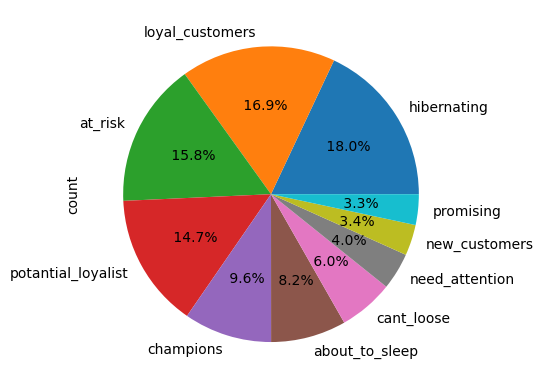

In [53]:
rfm_table['RF_SEGMENTS'].value_counts().plot(kind='pie', autopct=' %1.1f%%')
plt.show(block=True)